In [1]:
import os
import sys
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath(".."))
from common import common
import importlib
importlib.reload(common)

<module 'common.common' from '/Users/suyeetan/Downloads/CS5344_Project/work/common/common.py'>

In [2]:
%run ../datasets/hepatitis.ipynb

## 1. Understand the Structure of the Data
* Inspect data types of each column
* Check dimensions of the dataset
* View initial records

In [3]:
all_df, main_labels, config = get_hepatitis_df()

Normal class:  0    0=Blood Donor
Name: Category, dtype: object


In [4]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


In [5]:
all_df.shape

(615, 14)

In [6]:
all_df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## 2. Data Cleaning Check
* Check for null/missing values
* Check for wrong values
* Drop unnecessary columns

In [7]:
all_df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

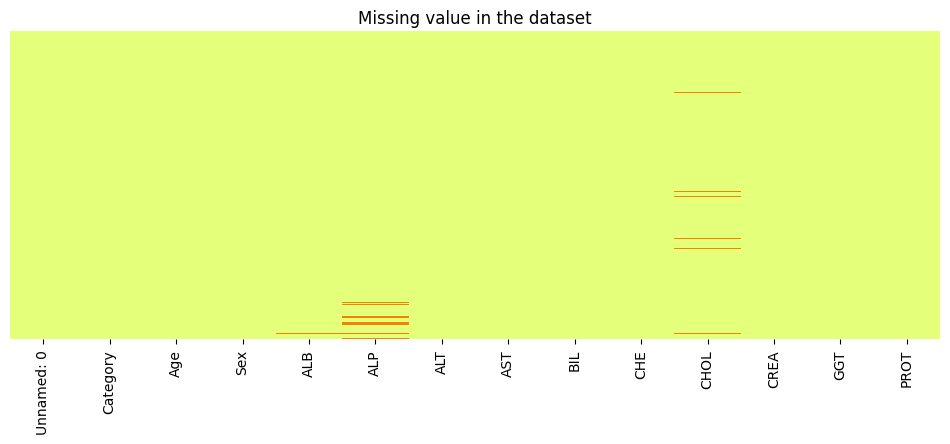

In [8]:
common.show_missing_values(all_df)

In [9]:
for col in all_df.columns:
    print(all_df[col].value_counts())
    print("--------------------------------")

Unnamed: 0
1      1
414    1
407    1
408    1
409    1
      ..
207    1
208    1
209    1
210    1
615    1
Name: count, Length: 615, dtype: int64
--------------------------------
Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64
--------------------------------
Age
46    32
48    28
33    25
51    24
52    22
50    21
49    21
35    21
38    20
53    20
37    20
43    20
44    20
47    20
56    20
45    19
34    19
59    18
32    17
57    16
36    16
41    16
39    15
40    14
55    14
42    13
54    12
60    12
58    10
61     9
64     9
62     8
65     8
63     6
68     4
66     4
67     3
70     3
71     3
76     2
74     2
29     2
77     1
19     1
23     1
25     1
27     1
30     1
75     1
Name: count, dtype: int64
--------------------------------
Sex
m    377
f    238
Name: count, dtype: int64
--------------------------------
ALB
39.0    14


In [10]:
all_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [11]:
numerical_columns = config['NUMERICAL_COLUMNS']
all_df[numerical_columns] = all_df[numerical_columns].fillna(all_df[numerical_columns].median())

## 3. Summary Statistics
* Mean, median, min, max, percentiles
* Understand data distribution for numerical features
* Check for outliers

In [12]:
all_df.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,47.408130,41.620732,68.222927,28.441951,34.786341,11.396748,8.196634,5.366992,81.287805,39.533171,72.044390
std,10.055105,5.775935,25.646364,25.449889,33.090690,19.673150,2.205657,1.123499,49.756166,54.661071,5.398238
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.950000,16.400000,21.600000,5.300000,6.935000,4.620000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,79.300000,33.050000,32.900000,11.200000,9.590000,6.055000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


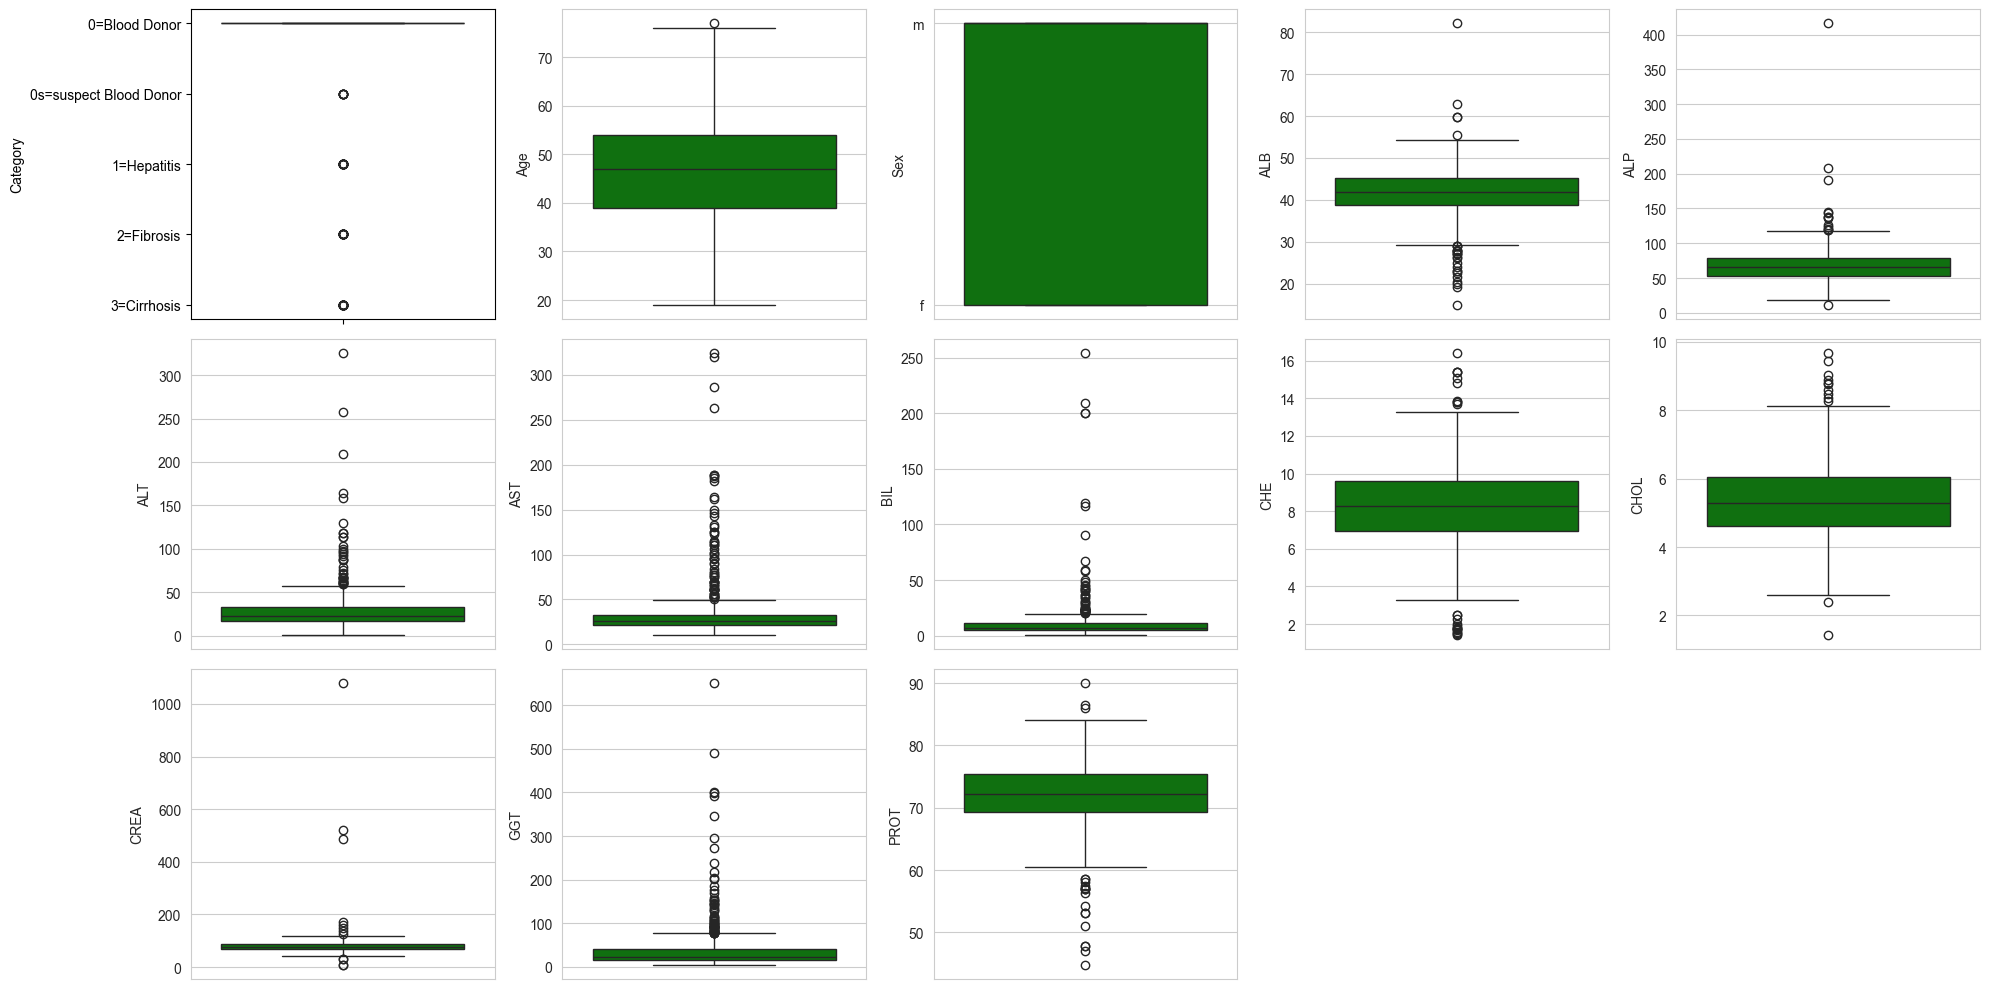

In [13]:
common.show_boxplots(all_df)

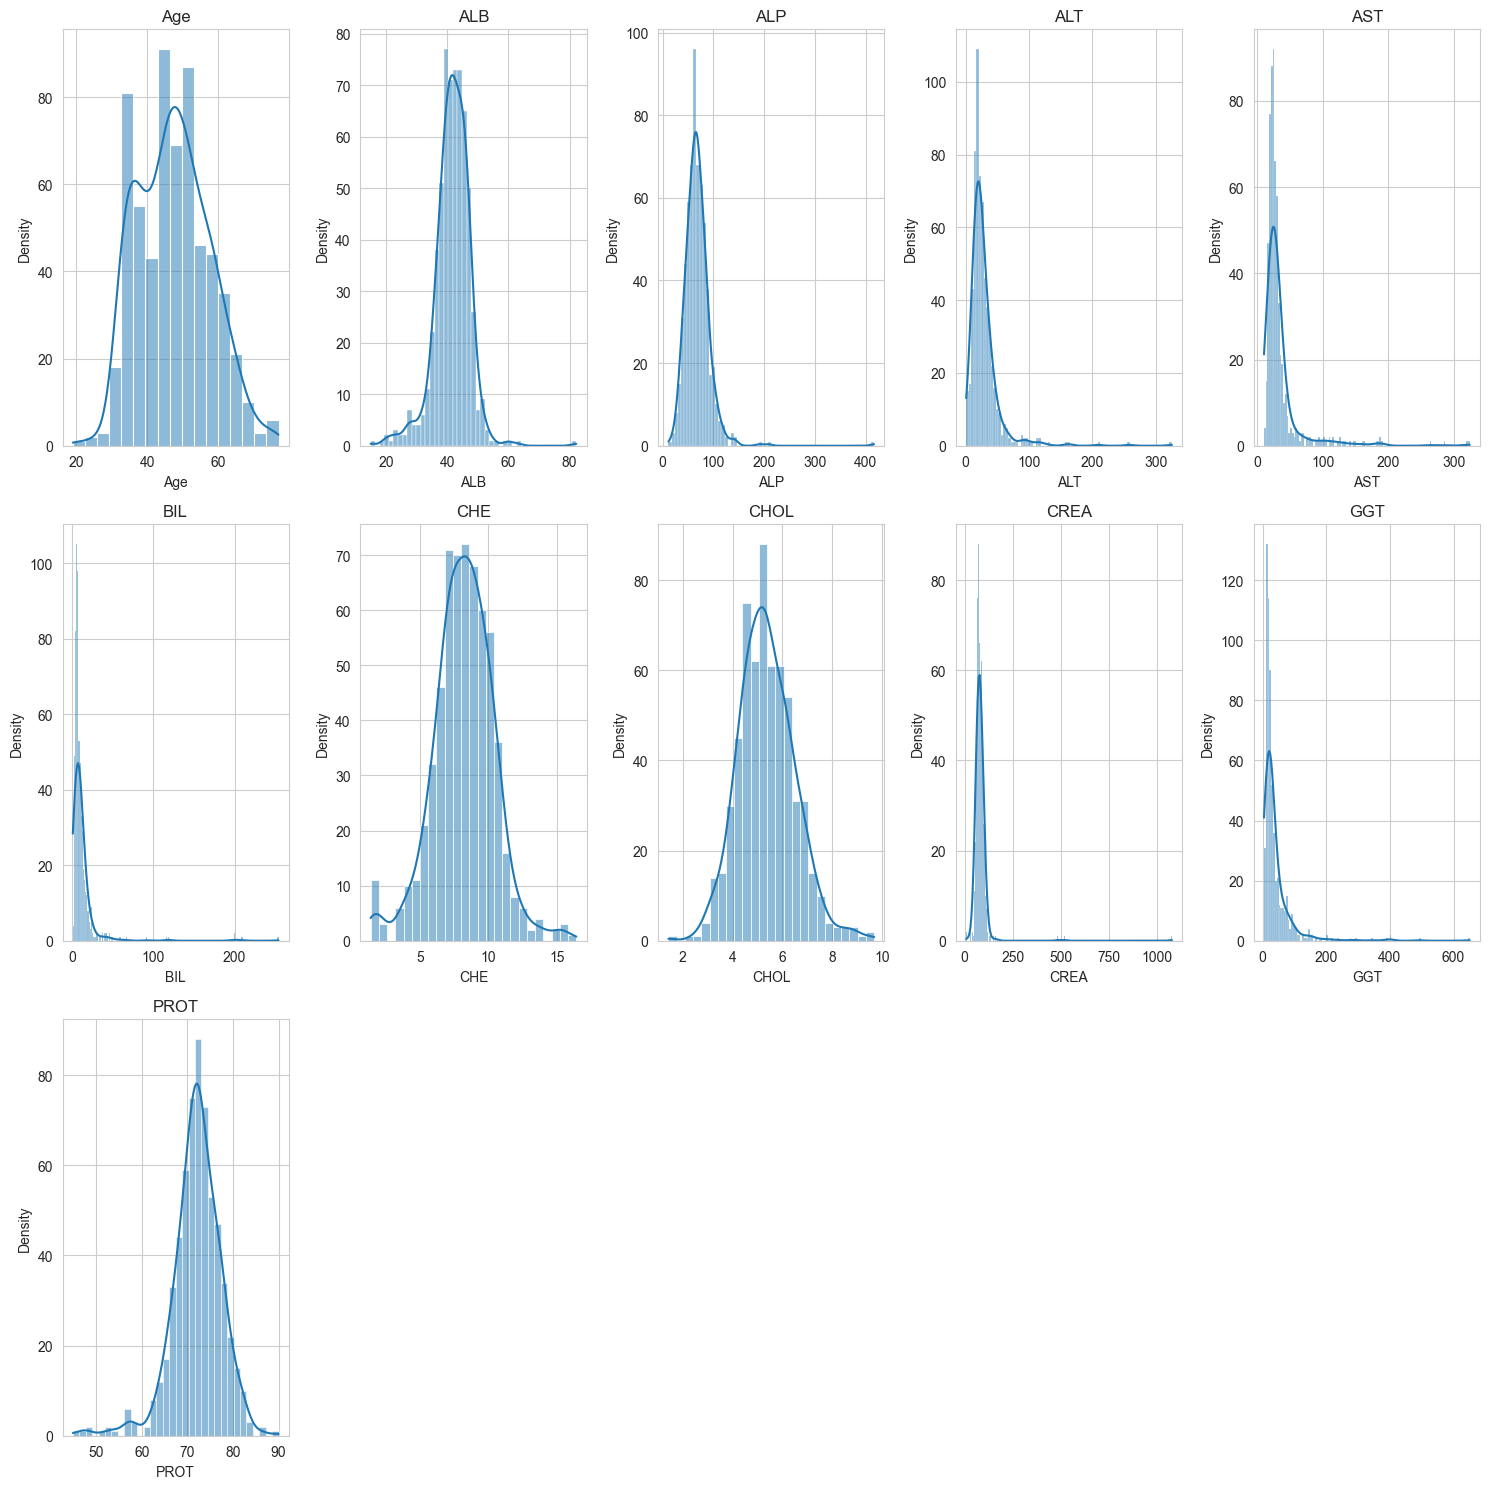

In [14]:
columns_to_plot_distribution = ['Age', 'ALB', 'ALP', 'ALT', 'AST','BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']
num_df = all_df.loc[:, columns_to_plot_distribution]
common.show_distribution_graph(num_df, columns_to_plot_distribution)

## 4. Univariate Analysis (Single Variable)
* Categorical variables:
    * Frequency distribution
    * Bar plots or pie charts.
* Numerical variables:
    * Histograms or box plots.
    * Distribution plots

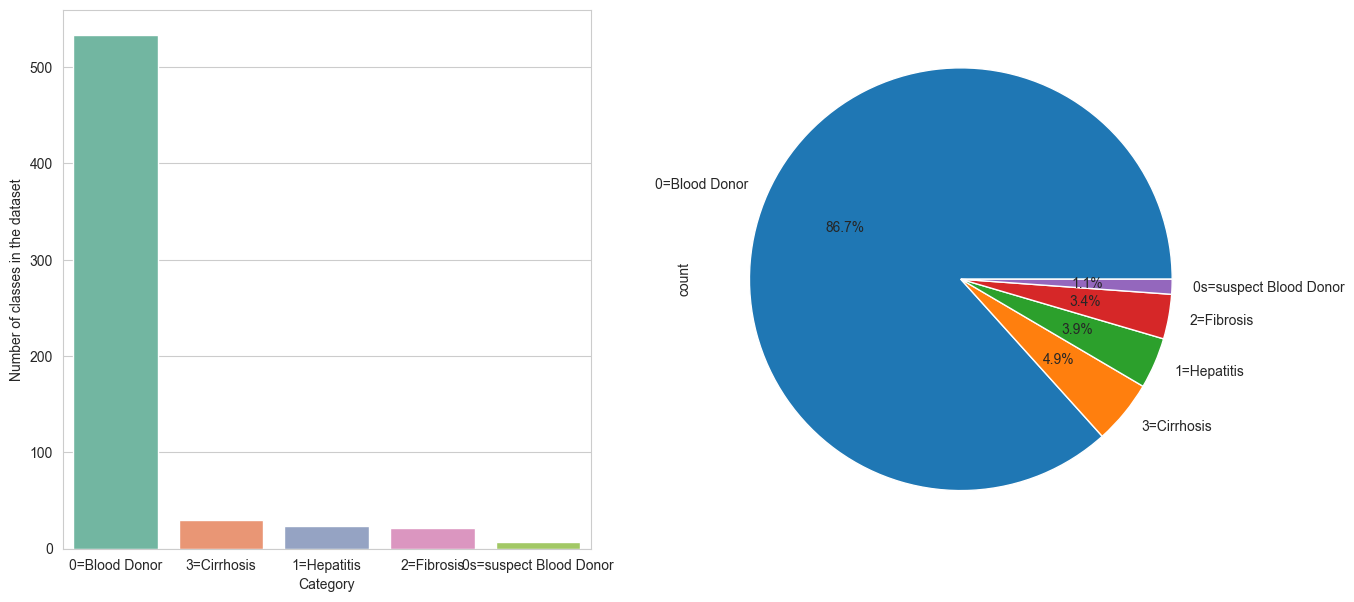

In [15]:
common.show_target_values(all_df, config['TARGET_COLUMN'])

## 5. Bivariate/Multivariate Analysis
* Correlation matrix (for numerical variables)
* Scatter plots (to assess relationships between two numerical variables)
* Pair plots (to visualize relationships across multiple variables)
* Group-wise statistics (e.g., groupby() for summarizing data by category)

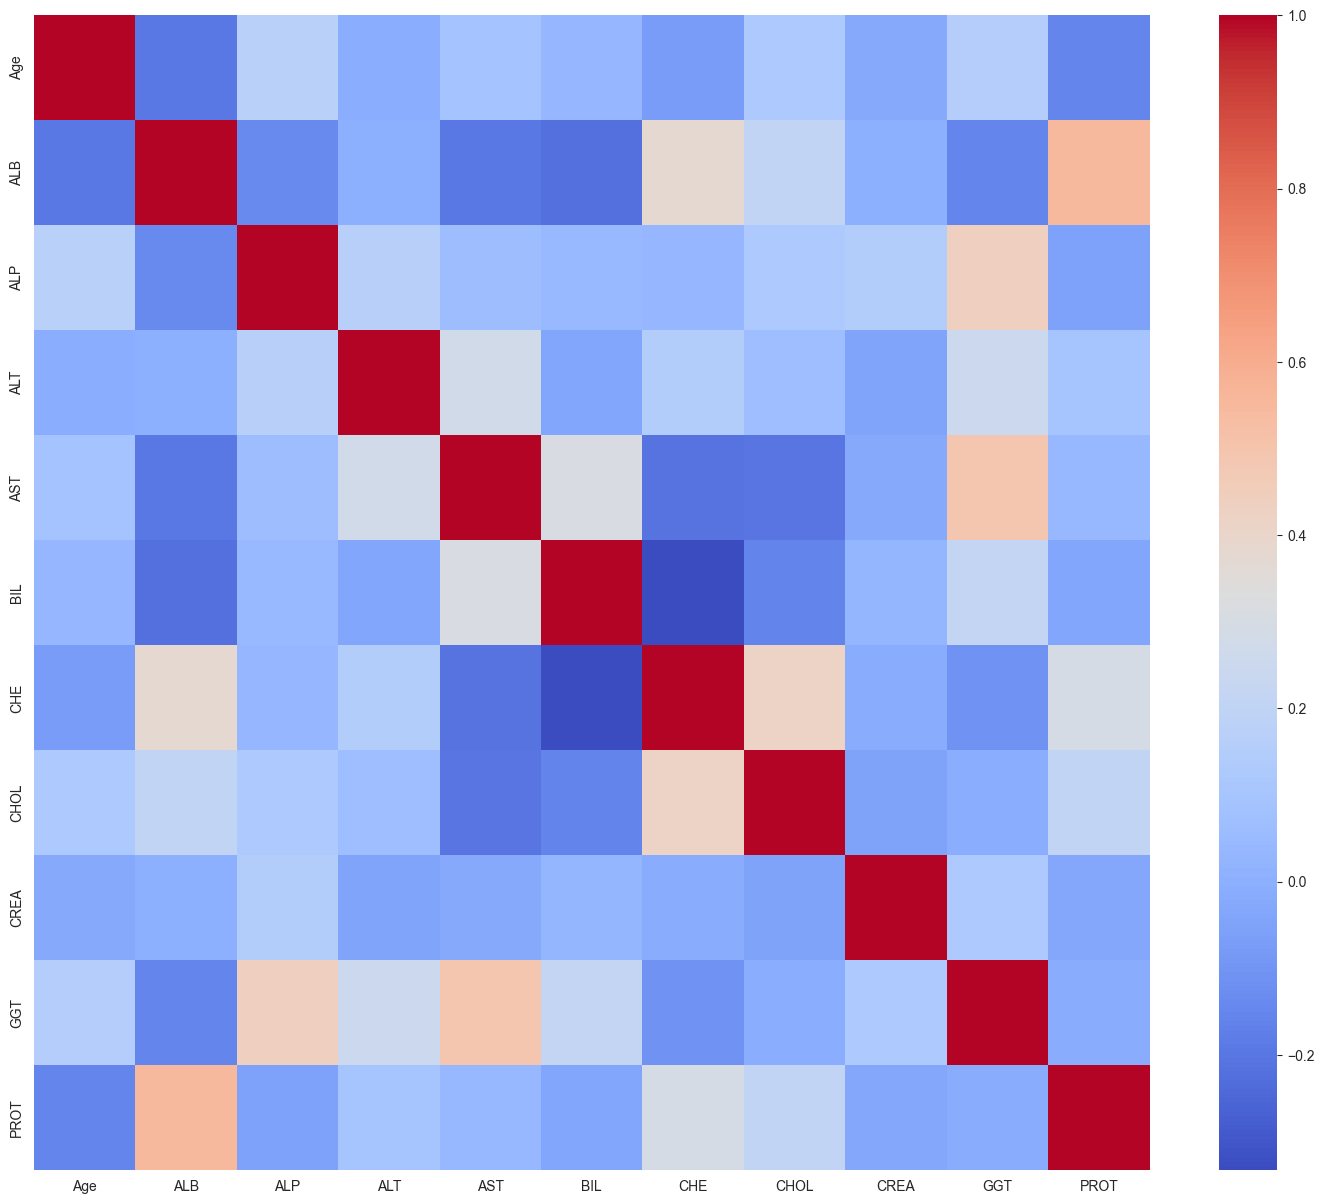

In [16]:
common.show_feature_correlation(num_df)